 결과 요약: rmse:0.0700 //이상점 제거 안함+ normalization//주기파악되고, trend가 (잘못?)생김

Data import

시도 내용 요약:
주중(1)/주말(2) + 겨울(1)봄(2)여름(3)가을(4) // 

이미 lstm이라는 것이 sequence 개념이 있으므로 시간축(1~397)를 feature로 설정하는 것은 의미가 없을 듯 하여 LSTM 시도3에서는 제외함

https://bigdatascientistblog.wordpress.com/2015/10/02/feature-engineering-with-dates-part-1/

에 따르면 날짜 datestampe에서 9가지의 특성을 끌어낼 수 있다고 한다. 따라서 이를 적용해보고자 한다.

data는 그대로 lstm2를 이용

year, month, day, day of week, week of year, hour of day

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
import pandas as pd
tf.set_random_seed(77)
def MinMaxScaler(data):
    numerator=data-np.min(data)
    denominator=np.max(data)-np.min(data)
    return numerator/(denominator+1e-7)



In [2]:
columns=['date','amount']

txs=pd.read_table('./lstmData/lstmPrac2.csv', sep=',',header=None,names=columns )
txs.info()
txs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
date      397 non-null object
amount    397 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


,date,amount
0,2016-01-01,34
1,2016-01-02,41
2,2016-01-03,54
3,2016-01-04,41
4,2016-01-05,35


In [3]:
from datetime import datetime                    

# 1. 기본 feature

In [4]:
year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year  
day_of_week = lambda x: datetime.strptime(x, "%Y-%m-%d" ).weekday()
month = lambda x: datetime.strptime(x, "%Y-%m-%d" ).month
# please read docs on how week numbers are calculate
week_number = lambda x: datetime.strptime(x, "%Y-%m-%d" ).strftime('%V')

# 2. 추가 feature

In [5]:
seasons = [0,0,1,1,1,2,2,2,3,3,3,0] #dec - feb is winter, then spring, summer, fall etc
season = lambda x: seasons[(datetime.strptime(x, "%Y-%m-%d" ).month-1)]

In [6]:
txs['year'] = txs['date'].map(year)
txs['month']=txs['date'].map(month)
txs['week_number']=txs['date'].map(week_number)
txs['season']=txs['date'].map(season)
txs['day_of_week']=txs['date'].map(day_of_week)
# txs['week_number']=txs['date'].map(week_number)
txs

,date,amount,year,month,week_number,season,day_of_week
0,2016-01-01,34,2016,1,53,0,4
1,2016-01-02,41,2016,1,53,0,5
2,2016-01-03,54,2016,1,53,0,6
3,2016-01-04,41,2016,1,01,0,0
4,2016-01-05,35,2016,1,01,0,1
5,2016-01-06,44,2016,1,01,0,2
6,2016-01-07,50,2016,1,01,0,3
7,2016-01-08,42,2016,1,01,0,4
8,2016-01-09,42,2016,1,01,0,5
9,2016-01-10,66,2016,1,01,0,6


pandas를 통해 구한 각 feature는 다음 코드를 통해 우리의 기준type인 list로 변경이 가능

In [7]:
list(txs['day_of_week'])

[4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,


# 3. 추가 가공

이상점 제거, normalization, bucketization 을 하여 새로운 열을 생성하는 방향으로

이상점 제거를 위해 평균과 표준편차를 구한다. 이상점의 기준은 일단 평균+-2*sd로 설정

In [8]:
np.mean(txs['amount'])

35.191435768261968

In [9]:
tempxy=[list(txs['season']),list(txs['day_of_week']),list(txs['week_number']), list(txs['amount'])]

In [10]:
tempxy

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,


In [11]:
xy=np.array(tempxy)

In [12]:
xy

array([['0', '0', '0', ..., '0', '0', '0'],
       ['4', '5', '6', ..., '6', '0', '1'],
       ['53', '53', '53', ..., '04', '05', '05'],
       ['34', '41', '54', ..., '0', '5', '31']], 
      dtype='<U21')

In [13]:
temp=xy.transpose()

In [14]:
temp

array([['0', '4', '53', '34'],
       ['0', '5', '53', '41'],
       ['0', '6', '53', '54'],
       ..., 
       ['0', '6', '04', '0'],
       ['0', '0', '05', '5'],
       ['0', '1', '05', '31']], 
      dtype='<U21')

In [15]:
xy = temp.astype(np.float)

In [16]:
xy

array([[  0.,   4.,  53.,  34.],
       [  0.,   5.,  53.,  41.],
       [  0.,   6.,  53.,  54.],
       ..., 
       [  0.,   6.,   4.,   0.],
       [  0.,   0.,   5.,   5.],
       [  0.,   1.,   5.,  31.]])

[[  0.           4.          53.           0.05964912]
 [  0.           5.          53.           0.07192982]
 [  0.           6.          53.           0.09473684]
 [  0.           0.           1.           0.07192982]
 [  0.           1.           1.           0.06140351]
 [  0.           2.           1.           0.07719298]
 [  0.           3.           1.           0.0877193 ]] -> [ 0.07368421]
[[  0.           5.          53.           0.07192982]
 [  0.           6.          53.           0.09473684]
 [  0.           0.           1.           0.07192982]
 [  0.           1.           1.           0.06140351]
 [  0.           2.           1.           0.07719298]
 [  0.           3.           1.           0.0877193 ]
 [  0.           4.           1.           0.07368421]] -> [ 0.07368421]
[[  0.           6.          53.           0.09473684]
 [  0.           0.           1.           0.07192982]
 [  0.           1.           1.           0.06140351]
 [  0.           2.          

 [ 0.          4.          6.          0.06491228]] -> [ 0.07894737]
[[ 0.          6.          5.          0.07017544]
 [ 0.          0.          6.          0.08070175]
 [ 0.          1.          6.          0.08596491]
 [ 0.          2.          6.          0.0877193 ]
 [ 0.          3.          6.          0.06491228]
 [ 0.          4.          6.          0.06491228]
 [ 0.          5.          6.          0.07894737]] -> [ 0.08421053]
[[ 0.          0.          6.          0.08070175]
 [ 0.          1.          6.          0.08596491]
 [ 0.          2.          6.          0.0877193 ]
 [ 0.          3.          6.          0.06491228]
 [ 0.          4.          6.          0.06491228]
 [ 0.          5.          6.          0.07894737]
 [ 0.          6.          6.          0.08421053]] -> [ 0.08421053]
[[ 0.          1.          6.          0.08596491]
 [ 0.          2.          6.          0.0877193 ]
 [ 0.          3.          6.          0.06491228]
 [ 0.          4.          6

 [  0.00000000e+00   2.00000000e+00   4.90000000e+01   2.28070175e-02]] -> [ 0.03684211]
[[  0.00000000e+00   4.00000000e+00   4.80000000e+01   3.15789474e-02]
 [  0.00000000e+00   5.00000000e+00   4.80000000e+01   1.92982456e-02]
 [  0.00000000e+00   6.00000000e+00   4.80000000e+01   2.45614035e-02]
 [  0.00000000e+00   0.00000000e+00   4.90000000e+01   5.96491228e-02]
 [  0.00000000e+00   1.00000000e+00   4.90000000e+01   1.75438596e-02]
 [  0.00000000e+00   2.00000000e+00   4.90000000e+01   2.28070175e-02]
 [  0.00000000e+00   3.00000000e+00   4.90000000e+01   3.68421053e-02]] -> [ 0.06140351]
[[  0.00000000e+00   5.00000000e+00   4.80000000e+01   1.92982456e-02]
 [  0.00000000e+00   6.00000000e+00   4.80000000e+01   2.45614035e-02]
 [  0.00000000e+00   0.00000000e+00   4.90000000e+01   5.96491228e-02]
 [  0.00000000e+00   1.00000000e+00   4.90000000e+01   1.75438596e-02]
 [  0.00000000e+00   2.00000000e+00   4.90000000e+01   2.28070175e-02]
 [  0.00000000e+00   3.00000000e+00   4.9

[step: 39] loss: 1.4129540920257568
[step: 40] loss: 1.3883578777313232
[step: 41] loss: 1.3769583702087402
[step: 42] loss: 1.3781522512435913
[step: 43] loss: 1.375514030456543
[step: 44] loss: 1.369889736175537
[step: 45] loss: 1.3724687099456787
[step: 46] loss: 1.379070520401001
[step: 47] loss: 1.3766584396362305
[step: 48] loss: 1.3680094480514526
[step: 49] loss: 1.3659031391143799
[step: 50] loss: 1.369578242301941
[step: 51] loss: 1.3686943054199219
[step: 52] loss: 1.3633735179901123
[step: 53] loss: 1.3608694076538086
[step: 54] loss: 1.3597246408462524
[step: 55] loss: 1.354946494102478
[step: 56] loss: 1.3503891229629517
[step: 57] loss: 1.3509540557861328
[step: 58] loss: 1.3527016639709473
[step: 59] loss: 1.3511883020401
[step: 60] loss: 1.349089503288269
[step: 61] loss: 1.3487790822982788
[step: 62] loss: 1.347652792930603
[step: 63] loss: 1.3452540636062622
[step: 64] loss: 1.3446907997131348
[step: 65] loss: 1.3454241752624512
[step: 66] loss: 1.3445130586624146
[s

[step: 287] loss: 1.3056912422180176
[step: 288] loss: 1.3055779933929443
[step: 289] loss: 1.3054641485214233
[step: 290] loss: 1.3053489923477173
[step: 291] loss: 1.3052325248718262
[step: 292] loss: 1.3051153421401978
[step: 293] loss: 1.3049968481063843
[step: 294] loss: 1.304877758026123
[step: 295] loss: 1.304756999015808
[step: 296] loss: 1.304635763168335
[step: 297] loss: 1.3045135736465454
[step: 298] loss: 1.3043897151947021
[step: 299] loss: 1.3042653799057007
[step: 300] loss: 1.3041399717330933
[step: 301] loss: 1.3040132522583008
[step: 302] loss: 1.30388605594635
[step: 303] loss: 1.3037577867507935
[step: 304] loss: 1.3036288022994995
[step: 305] loss: 1.3034992218017578
[step: 306] loss: 1.303368330001831
[step: 307] loss: 1.3032371997833252
[step: 308] loss: 1.3031048774719238
[step: 309] loss: 1.302972674369812
[step: 310] loss: 1.302839756011963
[step: 311] loss: 1.3027067184448242
[step: 312] loss: 1.3025728464126587
[step: 313] loss: 1.3024390935897827
[step: 31

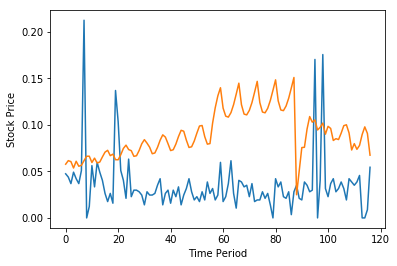

[step: 0] loss: 16.77649688720703
[step: 1] loss: 12.894186973571777
[step: 2] loss: 6.212916851043701
[step: 3] loss: 3.6829490661621094
[step: 4] loss: 4.309176921844482
[step: 5] loss: 4.389495849609375
[step: 6] loss: 4.0946125984191895
[step: 7] loss: 3.9375267028808594
[step: 8] loss: 3.5853614807128906
[step: 9] loss: 2.9055850505828857
[step: 10] loss: 2.3908376693725586
[step: 11] loss: 2.38330340385437
[step: 12] loss: 2.5391407012939453
[step: 13] loss: 2.410871744155884
[step: 14] loss: 2.109868288040161
[step: 15] loss: 1.9842591285705566
[step: 16] loss: 2.059300661087036
[step: 17] loss: 2.0855536460876465
[step: 18] loss: 1.9336239099502563
[step: 19] loss: 1.7263766527175903
[step: 20] loss: 1.6356291770935059
[step: 21] loss: 1.6570372581481934
[step: 22] loss: 1.6650625467300415
[step: 23] loss: 1.63911771774292
[step: 24] loss: 1.6554887294769287
[step: 25] loss: 1.698926329612732
[step: 26] loss: 1.677662968635559
[step: 27] loss: 1.5949419736862183
[step: 28] loss

[step: 258] loss: 1.3086440563201904
[step: 259] loss: 1.3085497617721558
[step: 260] loss: 1.3084548711776733
[step: 261] loss: 1.3083603382110596
[step: 262] loss: 1.3082646131515503
[step: 263] loss: 1.3081690073013306
[step: 264] loss: 1.3080726861953735
[step: 265] loss: 1.3079761266708374
[step: 266] loss: 1.307878851890564
[step: 267] loss: 1.3077815771102905
[step: 268] loss: 1.3076831102371216
[step: 269] loss: 1.3075848817825317
[step: 270] loss: 1.3074852228164673
[step: 271] loss: 1.3073855638504028
[step: 272] loss: 1.307284951210022
[step: 273] loss: 1.307184100151062
[step: 274] loss: 1.3070825338363647
[step: 275] loss: 1.3069803714752197
[step: 276] loss: 1.3068773746490479
[step: 277] loss: 1.3067736625671387
[step: 278] loss: 1.3066691160202026
[step: 279] loss: 1.3065637350082397
[step: 280] loss: 1.3064578771591187
[step: 281] loss: 1.3063507080078125
[step: 282] loss: 1.3062431812286377
[step: 283] loss: 1.306134581565857
[step: 284] loss: 1.3060251474380493
[step

RMSE: 0.07000263780355453


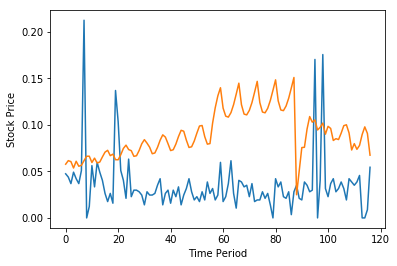

In [17]:
#train parameters
seq_length=7
data_dim=4
hidden_dim=10
output_dim=1
learning_rate=0.01
iterations=500
#기본형식
#기본 인자로는 ds-y로 받고 
#처리함수에서 ds를 받아서 'feature 처리모듈'에서 ds에서 요일(주중, 주말), 월(계절) + 날씨와 같은 추가 요인-값을 받는다.
xy[:,3]=MinMaxScaler(xy[:,3])

x=xy
y=xy[:,[-1]]

#build a dataset
dataX=[]
dataY=[]
for i in range(0, len(y)-seq_length):
    _x=x[i:i+seq_length]
    _y=y[i+seq_length]
    print(_x,"->",_y)
    dataX.append(_x)
    dataY.append(_y)

# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:])

#input place holders
X=tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y=tf.placeholder(tf.float32, [None, 1])
# build a LSTM network(input: cell shape, type/ )
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32) 

# use the last cell's output to calculate Y_pred
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=tf.tanh) 
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()


[step: 498] loss: 1.2763922214508057
[step: 499] loss: 1.276153802871704
RMSE: 0.07000263780355453


In [18]:
testY

array([[ 0.04736842],
       [ 0.04385965],
       [ 0.03684211],
       [ 0.04912281],
       [ 0.04210526],
       [ 0.03684211],
       [ 0.05087719],
       [ 0.2122807 ],
       [ 0.        ],
       [ 0.0122807 ],
       [ 0.05614035],
       [ 0.03333333],
       [ 0.05964912],
       [ 0.04912281],
       [ 0.04035088],
       [ 0.02631579],
       [ 0.01754386],
       [ 0.02631579],
       [ 0.01578947],
       [ 0.13684211],
       [ 0.10350877],
       [ 0.05087719],
       [ 0.04035088],
       [ 0.02105263],
       [ 0.06315789],
       [ 0.02280702],
       [ 0.02982456],
       [ 0.02982456],
       [ 0.02807018],
       [ 0.0245614 ],
       [ 0.01403509],
       [ 0.02807018],
       [ 0.0245614 ],
       [ 0.0245614 ],
       [ 0.02631579],
       [ 0.03508772],
       [ 0.04210526],
       [ 0.01403509],
       [ 0.02631579],
       [ 0.02982456],
       [ 0.01578947],
       [ 0.02982456],
       [ 0.02280702],
       [ 0.03333333],
       [ 0.01403509],
       [ 0

In [20]:
dataX

[array([[  0.        ,   4.        ,  53.        ,   0.05964912],
        [  0.        ,   5.        ,  53.        ,   0.07192982],
        [  0.        ,   6.        ,  53.        ,   0.09473684],
        [  0.        ,   0.        ,   1.        ,   0.07192982],
        [  0.        ,   1.        ,   1.        ,   0.06140351],
        [  0.        ,   2.        ,   1.        ,   0.07719298],
        [  0.        ,   3.        ,   1.        ,   0.0877193 ]]),
 array([[  0.        ,   5.        ,  53.        ,   0.07192982],
        [  0.        ,   6.        ,  53.        ,   0.09473684],
        [  0.        ,   0.        ,   1.        ,   0.07192982],
        [  0.        ,   1.        ,   1.        ,   0.06140351],
        [  0.        ,   2.        ,   1.        ,   0.07719298],
        [  0.        ,   3.        ,   1.        ,   0.0877193 ],
        [  0.        ,   4.        ,   1.        ,   0.07368421]]),
 array([[  0.        ,   6.        ,  53.        ,   0.09473684],
      